### Introduction
Mission Statement: Rooted in Rights tells authentic, accessible stories to challenge stigma and redefine narratives around disability, mental health, and chronic illness.
As part of Disability Rights Washington, our Seattle-based team of disabled video producers, editors, and digital organizers partner with both local coalitions and national advocacy campaigns to fight for concrete changes for our community.
Rooted in Rights is a project of Disability Rights Washington. https://www.disabilityrightswa.org/  

### Business Understanding  
This project will attempt to answer questions posed by Anna Letitia Zivarts (206) 718-8432 (206.324.1521 x242), Program Director for RootedinRights.org. https://rootedinrights.org/  
1) number of households in Washington State where there are more people than vehicles, as a measure to show people who don't have consistent access to a car for all of their transit needs.  
2) percent of the population that is under the age of 16  
3) number of non-driver ID or percentage of non-driver IDs issued by the DMV compared to driver's licenses,  
4) number or percentage of individuals in Washington State who have a disability that prevents them from driving (this would include elders). I would love to see this data broken down by county for our state.  
5) Added in subsequent email content: "... he had the suggestion that it might also be useful to just get the current number of active drivers licenses in Washington state and divide by the population. This wouldn't account for people who have out of state licenses, but maybe DOL has an estimate for what percentage of the population"  

### Analytic Approach  
(No machine-learning algorithms are required...yet)  

### Data Requirements  
We're going to need structured/un-structured data in electronic form, like a database or flatfile, obtainable via online channels, that can be downloaded and manipulated  

### Data Collection Question #2  
#### "percent of the population that is under the age of 16"  
Data source: https://www.ofm.wa.gov/sites/default/files/public/dataresearch/pop/asr/agesex/ofm_pop_age_sex_postcensal_2010_2018.xlsx

In [255]:
# import libraries
import pandas as pd
import numpy as np
import xlrd

# Use the full output window width if needed for Jupyter Notebook
# pd.set_option('display.width', None)

In [256]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

The following data storage access credentials will be removed prior to linking this project outside of the Watson environment

In [257]:
# The code was removed by Watson Studio for sharing.

,Area Name,Area ID,Age Group,2010 Total,2010 Male,2010 Female,2011 Total,2011 Male,2011 Female,2012 Total,...,2015 Female,2016 Total,2016 Male,2016 Female,2017 Total,2017 Male,2017 Female,2018 Total,2018 Male,2018 Female
0,Washington,53000,0-4,439657,225088,214569,438885,224542,214343,436713,...,215091,447560,228945,218615,454134,232308,221826,455075,232789,222286
1,Washington,53000,5-9,429877,219702,210175,429397,219489,209908,434460,...,221216,460236,235420,224816,465666,238017,227649,470073,240138,229935
2,Washington,53000,10-14,438233,224717,213516,438463,224870,213593,436907,...,215292,445863,228007,217856,457106,233979,223127,469139,240650,228489
3,Washington,53000,15,89009.6,45594.2,43415.3,87634,44902,42732,87582,...,43802,90341,46331,44010,88984,45512,43472,89999,45685,44314
4,Washington,53000,16,90820,46512.1,44307.9,89055,45628,43427,87763,...,43435,91034,46697,44337,91463,46902,44561,90029,46042,43987


### Data Understanding  
Let's take a look at what kind of information is in this data file

In [258]:
# check the dataframe information
# print('df', df.shape,'\n', df.head(10), '\n')
df.info()

# check the dataframe statistics
# df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 30 columns):
Area Name      960 non-null object
Area ID        960 non-null object
Age Group      960 non-null object
2010 Total     960 non-null object
2010 Male      960 non-null object
2010 Female    960 non-null object
2011 Total     960 non-null object
2011 Male      960 non-null object
2011 Female    960 non-null object
2012 Total     960 non-null object
2012 Male      960 non-null object
2012 Female    960 non-null object
2013 Total     960 non-null object
2013 Male      960 non-null object
2013 Female    960 non-null object
2014 Total     960 non-null object
2014 Male      960 non-null object
2014 Female    960 non-null object
2015 Total     960 non-null object
2015 Male      960 non-null object
2015 Female    960 non-null object
2016 Total     960 non-null object
2016 Male      960 non-null object
2016 Female    960 non-null object
2017 Total     960 non-null object
2017 Male      960 n

We see that there's 960 rows (observations) for the year periods 2010 ~ 2018, and 30 columns (features)  comprised of 'Total', 'Male', and 'Female' of the datatype 'object'

### Data Preparation  
We're going to shape the data into a form we can use to answer questions  

In [259]:
# Lets revise the feature names for readability
# Create an empty list
featurenames = []

# Loop through the dataframe feature names
for i in range(len(df.columns)):
    if ' ' in df.columns[i]:
        # get a list of the feature names after replacing the 'space' in the feature name
        featurenames.append(df.columns[i].replace(' ',''))
        
# integrate the new feature names
df.columns = featurenames

# check the dataframe's first 23 rows
df.head(23)

,AreaName,AreaID,AgeGroup,2010Total,2010Male,2010Female,2011Total,2011Male,2011Female,2012Total,...,2015Female,2016Total,2016Male,2016Female,2017Total,2017Male,2017Female,2018Total,2018Male,2018Female
0,Washington,53000,0-4,439657,225088,214569,438885,224542,214343,436713,...,215091,447560,228945,218615,454134,232308,221826,455075,232789,222286
1,Washington,53000,5-9,429877,219702,210175,429397,219489,209908,434460,...,221216,460236,235420,224816,465666,238017,227649,470073,240138,229935
2,Washington,53000,10-14,438233,224717,213516,438463,224870,213593,436907,...,215292,445863,228007,217856,457106,233979,223127,469139,240650,228489
3,Washington,53000,15,89009.6,45594.2,43415.3,87634,44902,42732,87582,...,43802,90341,46331,44010,88984,45512,43472,89999,45685,44314
4,Washington,53000,16,90820,46512.1,44307.9,89055,45628,43427,87763,...,43435,91034,46697,44337,91463,46902,44561,90029,46042,43987
5,Washington,53000,17,93744.8,48569.3,45175.4,90862,46534,44328,89189,...,43607,90577,46564,44013,92217,47275,44942,92589,47453,45136
6,Washington,53000,18,94531.5,48782.5,45749.1,93825,48594,45231,91021,...,43697,90682,46425,44257,91948,47261,44687,93532,47940,45592
7,Washington,53000,19,94022.1,48118.8,45903.3,94561,48766,45795,94068,...,43952,91318,46711,44607,92660,47458,45202,93830,48247,45583
8,Washington,53000,20-24,461512,238131,223381,462100,238320,223780,467107,...,234296,484886,248717,236169,487273,249485,237788,488617,249589,239028
9,Washington,53000,25-29,480398,245014,235384,478335,244415,233920,473373,...,233973,494271,253878,240393,511429,262398,249031,527632,270764,256868


In [260]:
# Extract the 'AgeGroup' rows (0-4, 5-9, 10-14, 15) for the sum figure <16 years-old by year 2010 ~ 2018
# Save the 'AgeGroup' information to a new series; convert the data values from object to integer
df_agegroups = df.loc[0:4,['2010Total','2011Total','2012Total','2013Total','2014Total','2015Total','2016Total','2017Total','2018Total']].sum(axis=0).astype('int').to_frame()

# Add an index to the series
df_agegroups.reset_index(inplace=True)

# Add some feature names
df_agegroups.columns = ['Year','AgeGroupSum']

# Check the series
df_agegroups

,Year,AgeGroupSum
0,2010Total,1487596
1,2011Total,1483434
2,2012Total,1483425
3,2013Total,1489097
4,2014Total,1499842
5,2015Total,1513394
6,2016Total,1535034
7,2017Total,1557353
8,2018Total,1574315


In [261]:
# In the original dataframe, row index 22 is the total population figure for the year. Let's extract those figures for the yearly periods; assign to a new dataframe 'df_population'
df_population = df.iloc[22, [3,6,9,12,15,18,21,24,27]].astype('int').to_frame()

# Add an index
df_population.reset_index(inplace=True)

# Revise the feature names
df_population.columns = ['Year','PopulationTotal']

df_population

,Year,PopulationTotal
0,2010Total,6724539
1,2011Total,6767900
2,2012Total,6817770
3,2013Total,6882400
4,2014Total,6968170
5,2015Total,7061410
6,2016Total,7183700
7,2017Total,7310300
8,2018Total,7427570


Now we have the subsets for the population <16 years old and the total population figures for the years 2010 ~ 2018

In [262]:
# Create an aggragate dataframe object with similar column features
df_agg = pd.DataFrame(columns=['Year','AgeGroupSum','PopulationTotal'])

# Check the dataframe structure
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
Year               0 non-null object
AgeGroupSum        0 non-null object
PopulationTotal    0 non-null object
dtypes: object(3)
memory usage: 0.0+ bytes


In [263]:
# Lets combine the tables into this new dataframe 'df_agg'
try:
    # Verify that the respective indexes have the same length
    assert(df_agegroups.shape[0] == df_population.shape[0])
    # Extract the number of rows
    number_rows = df_agegroups.shape[0]
    # Loop through both dataframes using the common index
    for i in range(number_rows):
        # Extract the respective feature values from both dataframes and add them to 'df_agg'
        df_agg.at[i,['Year','AgeGroupSum','PopulationTotal']] = df_agegroups['Year'][i].replace('Total',''), df_agegroups['AgeGroupSum'][i], df_population['PopulationTotal'][i]
        # Calculate the percentiles into a new feature
        df_agg.at[i,'PercentPortion'] = (df_agegroups['AgeGroupSum'][i] / df_population['PopulationTotal'][i]) * 100
#     # print(df_agegroups['AgeGroupSum'][i].astype('float'))
except AssertionError:
    print('The dataframe indexes are not the same length')

# Change the 'Year' feature to an integer instead of a string object
df_agg['Year'] = df_agg['Year'].astype('int')

# Confirm the typecast
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 4 columns):
Year               9 non-null int64
AgeGroupSum        9 non-null float64
PopulationTotal    9 non-null float64
PercentPortion     9 non-null float64
dtypes: float64(3), int64(1)
memory usage: 680.0 bytes


In [264]:
# Check the dataframe content
# print('df_agg', df_agg.shape, '\n', df_agg)
print('Annual Population Percentiles for Citizens (< 16 years old) in the state of Washington')
df_agg

Annual Population Percentiles for Citizens (< 16 years old) in the state of Washington


,Year,AgeGroupSum,PopulationTotal,PercentPortion
0,2010,1487596.0,6724539.0,22.121903
1,2011,1483434.0,6767900.0,21.918675
2,2012,1483425.0,6817770.0,21.758214
3,2013,1489097.0,6882400.0,21.636304
4,2014,1499842.0,6968170.0,21.524188
5,2015,1513394.0,7061410.0,21.431895
6,2016,1535034.0,7183700.0,21.368292
7,2017,1557353.0,7310300.0,21.303544
8,2018,1574315.0,7427570.0,21.195559


That's interesting, it appears that the <16 year-old segment is slightly decreasing by year

In [265]:
# Is the data normally distributed? Let's check, the Shapiro-Wilk test is a good choice for small sample sizes (n < 50)
# Bring-in a library
from scipy.stats import shapiro

alpha = .05
# stat_year, p_year = shapiro(df_agg['Year'])
# if p_year > alpha:
#     print(f"Data for the Year feature looks Gaussian (from a Normal distribution): statistic = {stat_year:.3f}, p = {p_year:.3f}")
# else:
#     print(f"Data for the Year feature does not look Gaussian (we may need to standardize the data): statistic = {stat_year:.3f}, p = {p_year:.3f}")

stat_AgeGroupSum, p_AgeGroupSum = shapiro(df_agg['AgeGroupSum'])
if p_AgeGroupSum > alpha:
    print(f"Data for the AgeGroupSum feature looks Gaussian (from a Normal distribution): statistic = {stat_AgeGroupSum:.3f}, p = {p_AgeGroupSum:.3f}")
else:
    print(f"Data for the AgeGroupSum feature does not look Gaussian (we may need to standardize the data): statistic = {stat_AgeGroupSum:.3f}, p = {p_AgeGroupSum:.3f}")

stat_PopulationTotal, p_PopulationTotal = shapiro(df_agg['PopulationTotal'])
if p_PopulationTotal > alpha:
    print(f"Data for the PopulationTotal feature looks Gaussian (from a Normal distribution): statistic = {stat_PopulationTotal:.3f}, p = {p_PopulationTotal:.3f}")
else:
    print(f"Data for the PopulationTotal feature does not look Gaussian (we may need to standardize the data): statistic = {stat_PopulationTotal:.3f}, p = {p_PopulationTotal:.3f}")

Data for the AgeGroupSum feature looks Gaussian (from a Normal distribution): statistic = 0.851, p = 0.077
Data for the PopulationTotal feature looks Gaussian (from a Normal distribution): statistic = 0.938, p = 0.557


Let's examine this age group trend a bit more

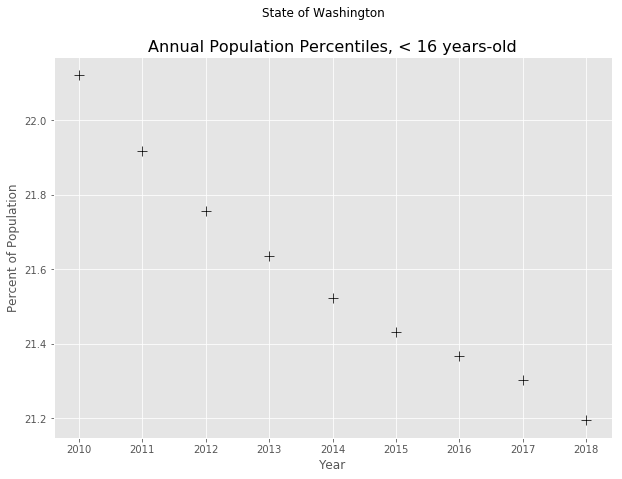

In [266]:
# Scatter plot using the seaborn package
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Apply some settings
mpl.style.use('ggplot')

# Create the object and set the plot size
fig = plt.figure(figsize=(10,7))

# Plot the data
sns.scatterplot(x=df_agg.Year, y=df_agg.PercentPortion, color='black', marker='+', s=100)

# Legend, title and labels
fig.suptitle('State of Washington', fontsize=12, fontweight=None)
plt.title('Annual Population Percentiles, < 16 years-old', size=16)
plt.xlabel('Year', size=12)
plt.ylabel('Percent of Population', size=12)
plt.show()

#### It appears that this population percentage is slowly decreasing. What might the 2019 estimate look like? Lets add a regression line to find out.

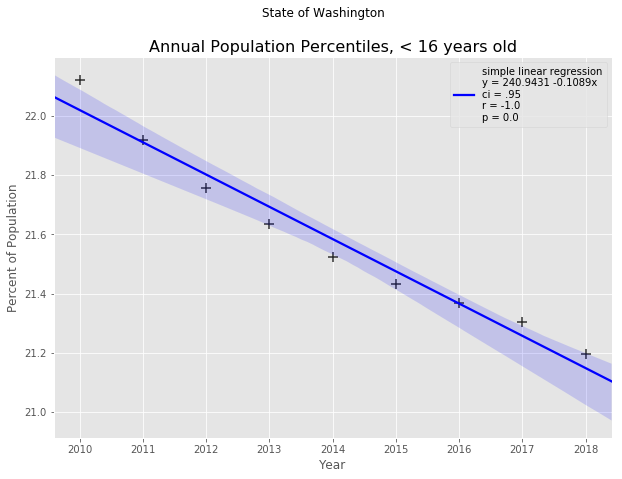

In [276]:
# Regression plot using the seaborn package
import seaborn as sns
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Apply some settings
mpl.style.use('ggplot')

# create the object and set the plot size
fig = plt.figure(figsize=(10,7))

# Plot the data and regression line
p = sns.regplot(x=df_agg.Year, y=df_agg.PercentPortion, color='black', marker='+', ci=95, line_kws={'color':'b'}, scatter_kws={'s':100})

slope, intercept, r, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())
# print(intercept, '\n', slope, '\n', r, '\n', p_value)

# Legend, title and labels
fig.suptitle('State of Washington', fontsize=12, fontweight=None)
plt.title('Annual Population Percentiles, < 16 years old', size=16)
plt.xlabel('Year', size=12)
plt.ylabel('Percent of Population', size=12);
plt.legend(labels=[f"simple linear regression\ny = {intercept:.4f} {slope:.4f}x\nci = .95\nr = {r}\np = {p_value}"])     #  (reference 2)
plt.show()

#### So... the estimate for 2019 could look something like this:

In [277]:
# Substitute values and calculate an estimate using the regression line equation
age_group_2019 = intercept + (slope * 2019)
print(f"about {age_group_2019:.4f}%")

about 21.0397%


### Data Collection Question #5 
#### Added in subsequent email content: "... he had the suggestion that it might also be useful to just get the current number of active drivers licenses in Washington state and divide by the population. This wouldn't account for people who have out of state licenses, but maybe DOL has an estimate for what percentage of the population"
Data source: WA DOL Statistics-at-a-Glance: https://www.dol.wa.gov/about/docs/2018-CY-stats-at-a-glance.pdf 

In [278]:
# Clarification: what is the percentage of DL, ID, and Permit card holders in the state of Washington by year?
# ...from the Point_in_Time 2018 annual Snapshot
# Create a new dataframe 
df_snapshot = pd.DataFrame(columns=['Year_snapshot', 'DriverLicenseDL', 'IdentificationCardID', 'InstructionPermit', 'PopulationTotal', 'DL_%', 'ID_%', 'Permit_%'])

# Save the value strings from the Point-in-Time .pdf file
df_snapshot['Year_snapshot'] = [2014, 2015, 2016, 2017, 2018]
df_snapshot['DriverLicenseDL'] = [5472566, 5576586, 5705688, 5842167, 5455219]
df_snapshot['IdentificationCardID'] = [618506, 615604, 623909, 634496, 662817]
df_snapshot['InstructionPermit'] = [85759, 86673, 87097, 86655, 86869]

# Check the table
# df_snapshot

#### We have data for the years 2014 to 2018. Lets extract the related PopulationTotal(s) from the AgeGroup table and fill-in the missing values for the percentile features. The categorical counts divided by the total population count for the respective year should provide the percentiles for question #5

In [279]:
for i in range(len(df_snapshot)):
    for i2 in range(len(df_agg)):
        # match the year
        if df_agg['Year'][i2] == df_snapshot['Year_snapshot'][i]:
            # the Year matches, save the 'PopulationTotal' row value to the snapshot table
            df_snapshot.at[i, 'PopulationTotal'] = df_agg['PopulationTotal'][i2]
            # now fill the respective values to the percentile columns
            df_snapshot.at[i, 'DL_%'] = "{:.3f}".format((df_snapshot['DriverLicenseDL'][i] / df_snapshot['PopulationTotal'][i]) * 100)
            df_snapshot.at[i, 'ID_%'] = "{:.3f}".format((df_snapshot['IdentificationCardID'][i] / df_snapshot['PopulationTotal'][i]) * 100)
            df_snapshot.at[i, 'Permit_%'] = "{:.3f}".format((df_snapshot['InstructionPermit'][i] / df_snapshot['PopulationTotal'][i]) * 100)
            
# Typecast some of the features
df_snapshot['Year_snapshot'] = df_snapshot['Year_snapshot'].astype('int32')
df_snapshot['PopulationTotal'] = df_snapshot['PopulationTotal'].astype('int64')
df_snapshot['DL_%'] = df_snapshot['DL_%'].astype('float')
df_snapshot['ID_%'] = df_snapshot['ID_%'].astype('float')
df_snapshot['Permit_%'] = df_snapshot['Permit_%'].astype('float')            
            
# check the table
df_snapshot

,Year_snapshot,DriverLicenseDL,IdentificationCardID,InstructionPermit,PopulationTotal,DL_%,ID_%,Permit_%
0,2014,5472566,618506,85759,6968170,78.537,8.876,1.231
1,2015,5576586,615604,86673,7061410,78.973,8.718,1.227
2,2016,5705688,623909,87097,7183700,79.425,8.685,1.212
3,2017,5842167,634496,86655,7310300,79.917,8.679,1.185
4,2018,5455219,662817,86869,7427570,73.446,8.924,1.170


#### Sometimes it's difficult to see a trend in a table format. Let's put this new percentile information into line plots

In [280]:
# Set the table index to the 'Year_snapshot' feature
df_snapshot.set_index('Year_snapshot', inplace=True)

# Drop the features we don't need for the graph
# df_snapshot.drop(['DriverLicenseDL','IdentificationCardID','InstructionPermit','PopulationTotal'], axis=1, inplace=True)

# Check the table
# df_snapshot

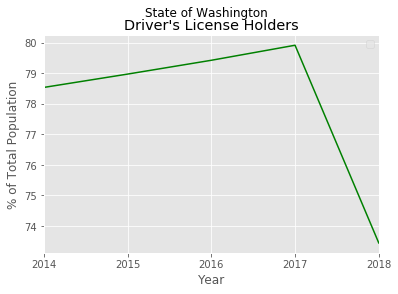

In [281]:
# Plot the line for the driver's license holders
df_snapshot[['DL_%']].plot(c='green')

# Set some items
plt.title("Driver's License Holders")
plt.suptitle('State of Washington')
plt.xlabel('Year')
plt.ylabel('% of Total Population')
plt.xticks([2014,2015,2016,2017,2018])
plt.legend([])    # loc='lower left'

# Show the plot
plt.show()

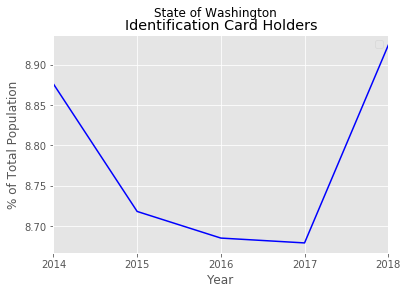

In [282]:
# Plot the line for identification card holders
df_snapshot[['ID_%']].plot(c='blue')

# Set some items
plt.title("Identification Card Holders")
plt.suptitle('State of Washington')
plt.xlabel('Year')
plt.ylabel('% of Total Population')
plt.xticks([2014,2015,2016,2017,2018])
plt.legend([])    # loc='lower left'

# Show the plot
plt.show()

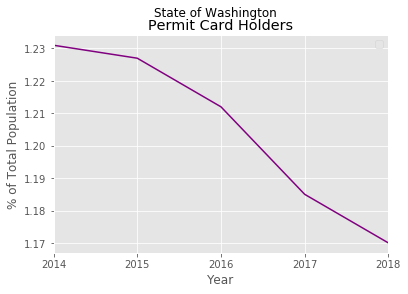

In [283]:
# Plot the line for permit card holders
df_snapshot[['Permit_%']].plot(c='purple')

# Set some items
plt.title("Permit Card Holders")
plt.suptitle('State of Washington')
plt.xlabel('Year')
plt.ylabel('% of Total Population')
plt.xticks([2014,2015,2016,2017,2018])
plt.legend([])    # loc='lower left'

# Show the plot
plt.show()

#### Alternatively, lets provide a bit more visualization using a vertical bar chart with bar-top values

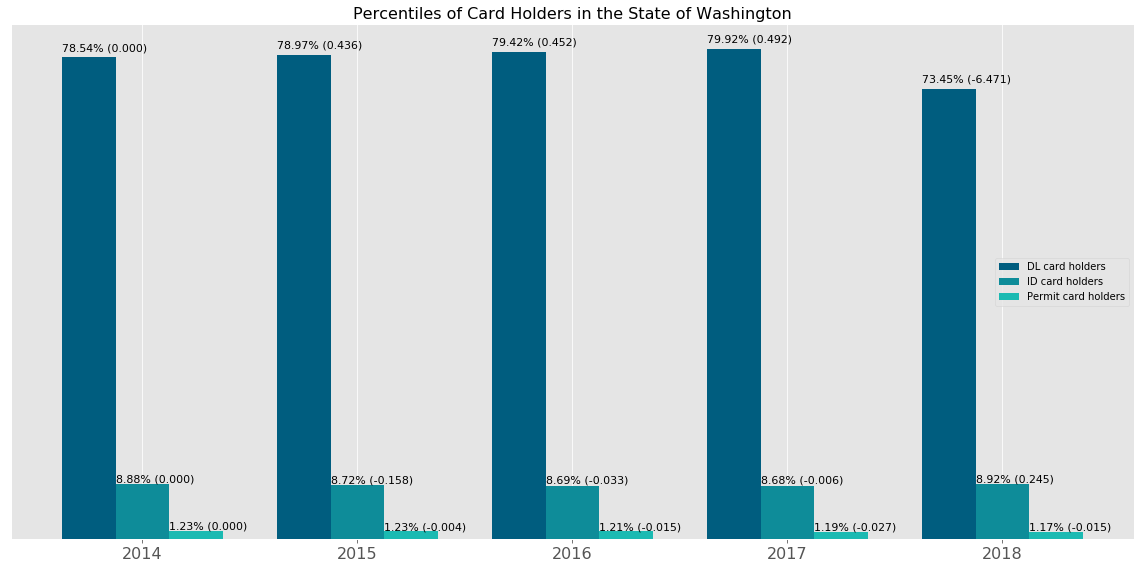

In [284]:
# Add features for the percentile change between years
df_snapshot['DL_%c'] = .0
df_snapshot['ID_%c'] = .0
df_snapshot['Permit_%c'] = .0

df_snapshot.reset_index(inplace=True)

# Fill-in the percentile change columns with values
for i in range(len(df_snapshot)):
    if i == 0:
        pass
    else:
        # the next index
        z = i - 1
        df_snapshot.at[i, 'DL_%c'] = df_snapshot['DL_%'][i] - df_snapshot['DL_%'][z]
        df_snapshot.at[i, 'ID_%c'] = df_snapshot['ID_%'][i] - df_snapshot['ID_%'][z]
        df_snapshot.at[i, 'Permit_%c'] = df_snapshot['Permit_%'][i] - df_snapshot['Permit_%'][z]
        
# Create data subsets
DL_counts = df_snapshot['DL_%'].values
ID_counts = df_snapshot['ID_%'].values
Permit_counts = df_snapshot['Permit_%'].values        
        
# Drop un-needed features
# df_snapshot.drop(['level_0','index'], axis=1,  inplace=True)

# There are five years-worth of bar groups
N = 5

# Set the x-axis spacing for the groups
ind = np.arange(N)

# Set the width of each bar
width = 0.25

# Create the object and plot size
fig, ax = plt.subplots(figsize=(16,8))

# Create each bar object with sequence, spacing, color, and values
rects1 = ax.bar(ind, DL_counts, width, color='#005d7f')                             # removed yerr=red_std, #5cb85c
rects2 = ax.bar((ind + width), ID_counts, width, color='#0E8C99')               #5bc0de
rects3 = ax.bar((ind + (width * 2)), Permit_counts, width, color='#1bbab2') #d9534f

# add settings for text, labels, title and axes ticks
ax.set_title('Percentiles of Card Holders in the State of Washington', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks((ind + width))  # /2
ax.set_xticklabels((
    df_snapshot.Year_snapshot.values[0],
    df_snapshot.Year_snapshot.values[1],
    df_snapshot.Year_snapshot.values[2],
    df_snapshot.Year_snapshot.values[3],
    df_snapshot.Year_snapshot.values[4]),
    rotation=0, fontsize=16
    )
# Remove the y-axis tick marks
ax.get_yaxis().set_ticks([])

# remove the plot borders
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# plt.box(False) # Remove the whole box

# Explicitly define the elements in the legend instead of the default values
ax.legend(
    # this line displays the color bar symbols
    (rects1[0], rects2[0], rects3[0]),
    # set the legend text
    ('DL card holders', 'ID card holders', 'Permit card holders'),
    fontsize=10, loc='right'
    ) # 'x-small'

# Define a function to attach a text label above each bar displaying its measure
def autolabel(rects):
    for r in range(len(rects)):
        height = rects[r].get_height()
        # Calculate the percentile change
        if r == 0:
            change = .0
        else:
            # the next index
            z = r - 1
            change = rects[r].get_height() - rects[z].get_height()
        # text location
        ax.text(
            rects[r].get_x(), #  + rects[r].get_width() / 2.
            # adjusts the position above the bar
            1.01 * height,
            # add the percent symbol to the text label
            '{:.2%} ({:.3f})'.format(height/100, change),
            ha='left',  # justification relative to the xy of bar
            va='bottom',
            fontsize=11
            )

# display the values
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Pull the FigureCanvas tight to the bars/legend as desired
plt.tight_layout()

# Show the plot
plt.show()        

# Check the table
# df_snapshot

#### The bar chart aptly expresses the difference in magnitude between card holder categories. Additionally, we can see the percentile incremental change in each category from year to year. 

#### References  
(1) Data source: https://www.ofm.wa.gov/sites/default/files/public/dataresearch/pop/asr/agesex/ofm_pop_age_sex_postcensal_2010_2018.xlsx   
(2) The discussion of which statistic this variable name (r_value) refers to (coefficient of correlation, r, or R^2) as extracted from the Seaborn regression process is discussed here:   
  https://stackoverflow.com/questions/33490833/display-regression-equation-in-seaborn-regplot Edit: the variable name refers to the coefficient of correlation.  
(3) Data source: WA DOL Statistics-at-a-Glance: https://www.dol.wa.gov/about/docs/2018-CY-stats-at-a-glance.pdf  
(4) Data source: WA DOL Statistics-at-a-Glance: https://www.dol.wa.gov/about/docs/2019-FY-stats-at-a-glance.pdf  (note that this report is June to June, unlike the report in (3)).  